In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [131]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

#to convert data from csv using the pandas
pdata = pd.read_csv(train_dataset_fp)



#to convert data from csv using the tensorflow
batch_size = 120
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
tdata = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


# **Plotting of data from both pandas and tensorflow**

tf.Tensor(
[0 2 2 1 1 0 2 0 2 0 2 1 1 1 0 2 2 2 1 1 0 1 0 0 0 1 0 1 2 1 0 0 1 1 2 0 2
 0 0 2 0 2 1 2 2 0 2 0 2 2 0 1 2 2 1 1 2 2 2 0 1 1 1 0 2 0 2 2 0 0 2 0 0 0
 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 2 2 2 2 2 2 1 2 2 0 1 2 2 0 0 0 0 0 1 0 0 2
 2 1 0 0 1 2 2 0 1], shape=(120,), dtype=int32)


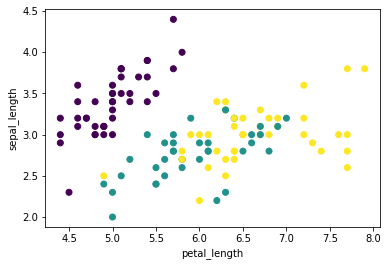

In [136]:
print(labels)

features,labels = next(iter(tdata))
plt.scatter(features["sepal_length"],features["sepal_width"],c=labels)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

No handles with labels found to put in legend.


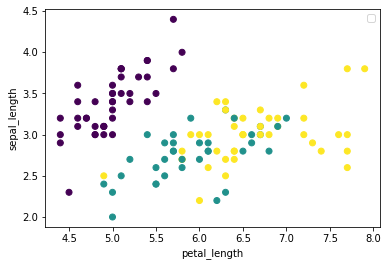

In [141]:
#for the representation according to the labels the pandas has to use the group by unlike the tensorflow who automaticall group by according to the labels or we can say the output
groups = pdata.groupby("species")
# for name, group in groups:
#     plt.scatter(group["sepal_length"],group["sepal_width"],label=name)

plt.scatter(pdata["sepal_length"],pdata["sepal_width"],c=pdata["species"])#for the distribution of the color the array of same size as equivalent to the number of input parameters is required else you have to use group by to roup by data for better ecalution
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.legend()
plt.show()

# **Training Model**